# Sprint18 dataset making

## イメージを読み込む (os.listdir  vs  glob.glob)

https://stackoverflow.com/questions/13643558/should-glob-glob-be-preferred-over-os-listdir-or-the-other-way-around

In [ ]:
# !pip install opencv-python==3.4.8.29

In [1]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

import cv2
from PIL import Image

%matplotlib inline

## osを使用する場合

In [77]:
path = './20191219-20_Sprint18/sample/' 
flist = os.listdir(path)

In [78]:
# 隠しファイル名も取得される

flist

['cat16notrgb.jpeg',
 'dog10.jpg',
 'dog04.jpg',
 'dog05.jpg',
 'dog11.jpg',
 'dog97.jpeg',
 'dog07.jpg',
 'dog13.jpg',
 'dog12.jpg',
 'dog06.jpg',
 'cat99.jpg',
 'dog02.jpg',
 'dog16.jpg',
 '.DS_Store',
 'dog17.jpg',
 'dog03.jpg',
 'dog15.jpg',
 'dog01.jpg',
 'dog96.jpeg',
 'dog00.jpg',
 'dog14.jpg',
 'cat03.jpg',
 'cat17.jpg',
 'cat14notrgb.jpeg',
 'cat02.jpg',
 'cat00.jpg',
 'cat01.jpg',
 'cat15.jpg',
 'cat19notrgb.jpeg',
 'cat11.jpg',
 'cat05.jpg',
 'cat04.jpg',
 'cat10.jpg',
 'cat06.jpg',
 'cat12.jpg',
 'dog08.jpeg',
 'cat13.jpg',
 'cat07.jpg',
 'cat09.jpg',
 'cat08.jpg',
 'cat18.jpg',
 'dog95.jpeg',
 'dog18.jpg',
 'dog99.jpeg',
 'dog98.jpeg',
 'dog09.jpg']

In [79]:
# '.DS_Store'のような隠しファイルを無視したい

flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]
flist_ignore


['cat16notrgb.jpeg',
 'dog10.jpg',
 'dog04.jpg',
 'dog05.jpg',
 'dog11.jpg',
 'dog97.jpeg',
 'dog07.jpg',
 'dog13.jpg',
 'dog12.jpg',
 'dog06.jpg',
 'cat99.jpg',
 'dog02.jpg',
 'dog16.jpg',
 'dog17.jpg',
 'dog03.jpg',
 'dog15.jpg',
 'dog01.jpg',
 'dog96.jpeg',
 'dog00.jpg',
 'dog14.jpg',
 'cat03.jpg',
 'cat17.jpg',
 'cat14notrgb.jpeg',
 'cat02.jpg',
 'cat00.jpg',
 'cat01.jpg',
 'cat15.jpg',
 'cat19notrgb.jpeg',
 'cat11.jpg',
 'cat05.jpg',
 'cat04.jpg',
 'cat10.jpg',
 'cat06.jpg',
 'cat12.jpg',
 'dog08.jpeg',
 'cat13.jpg',
 'cat07.jpg',
 'cat09.jpg',
 'cat08.jpg',
 'cat18.jpg',
 'dog95.jpeg',
 'dog18.jpg',
 'dog99.jpeg',
 'dog98.jpeg',
 'dog09.jpg']

In [80]:
# jpg 以外を消去
img_list = glob.glob(path + '/*' + ".jpg")

In [81]:
img_list

['./20191219-20_Sprint18/sample/dog10.jpg',
 './20191219-20_Sprint18/sample/dog04.jpg',
 './20191219-20_Sprint18/sample/dog05.jpg',
 './20191219-20_Sprint18/sample/dog11.jpg',
 './20191219-20_Sprint18/sample/dog07.jpg',
 './20191219-20_Sprint18/sample/dog13.jpg',
 './20191219-20_Sprint18/sample/dog12.jpg',
 './20191219-20_Sprint18/sample/dog06.jpg',
 './20191219-20_Sprint18/sample/cat99.jpg',
 './20191219-20_Sprint18/sample/dog02.jpg',
 './20191219-20_Sprint18/sample/dog16.jpg',
 './20191219-20_Sprint18/sample/dog17.jpg',
 './20191219-20_Sprint18/sample/dog03.jpg',
 './20191219-20_Sprint18/sample/dog15.jpg',
 './20191219-20_Sprint18/sample/dog01.jpg',
 './20191219-20_Sprint18/sample/dog00.jpg',
 './20191219-20_Sprint18/sample/dog14.jpg',
 './20191219-20_Sprint18/sample/cat03.jpg',
 './20191219-20_Sprint18/sample/cat17.jpg',
 './20191219-20_Sprint18/sample/cat02.jpg',
 './20191219-20_Sprint18/sample/cat00.jpg',
 './20191219-20_Sprint18/sample/cat01.jpg',
 './20191219-20_Sprint18/sample/

(224, 224, 3)


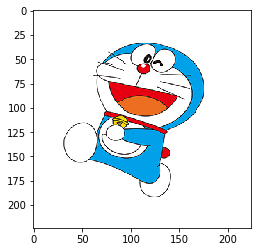

In [82]:
cat_img = Image.open(img_list[8])
        
# サイズを揃える
cat_img = cat_img.resize((224, 224))

cat_img = np.array(cat_img)

print(cat_img.shape)

plt.imshow(cat_img)

<class 'numpy.ndarray'>


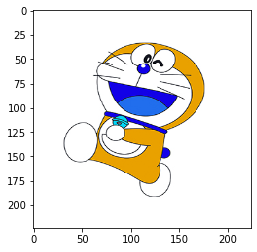

In [83]:
img = cv2.imread(img_list[8])

# cv2でリサイズ
img = cv2.resize(img, (224, 224))

print(type(img))

plt.imshow(img)

## イメージのロード、配列化、リサイズ、データセット作成

In [129]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img = Image.open(img)
        
        # サイズを揃える
        dog_img = dog_img.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        
        # 正規化
        dog_img = dog_img / 255.0
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img = Image.open(img)
        print(img)
        print(cat_img)
        cat_img = cat_img.resize((224, 224))
        
        cat_img = np.array(cat_img)
        
        cat_img = cat_img / 255.0
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)


./20191219-20_Sprint18/sample1/cat03.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1080x1079 at 0xB4D18D780>
./20191219-20_Sprint18/sample1/cat02.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0xB4D18D780>
./20191219-20_Sprint18/sample1/cat01.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=630x480 at 0xB4D18D780>
./20191219-20_Sprint18/sample1/cat05.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=400x265 at 0xB4D18D710>
./20191219-20_Sprint18/sample1/cat04.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1300x866 at 0xB4D18D710>


In [85]:
# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img = Image.open(img)
        
        # サイズを揃える
        dog_img = dog_img.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        
        # 正規化
        dog_img = dog_img / 255.0
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img = Image.open(img)
        
        cat_img = cat_img.resize((224, 224))
        
        cat_img = np.array(cat_img)
        
        cat_img = cat_img / 255.0
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)


In [86]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(18, 224, 224, 3)  cat_image:(18, 224, 224, 3)


In [128]:
print(dog_img_array)

[[[[0.4        0.4        0.4       ]
   [0.40392157 0.40392157 0.40392157]
   [0.44313725 0.44313725 0.44313725]
   ...
   [0.58039216 0.49411765 0.41176471]
   [0.59607843 0.50588235 0.45098039]
   [0.57254902 0.50196078 0.45490196]]

  [[0.39607843 0.39607843 0.39607843]
   [0.4        0.4        0.4       ]
   [0.43921569 0.43921569 0.43921569]
   ...
   [0.58431373 0.50588235 0.41176471]
   [0.58431373 0.50980392 0.45098039]
   [0.56862745 0.50196078 0.4627451 ]]

  [[0.4        0.4        0.4       ]
   [0.40392157 0.40392157 0.40392157]
   [0.43921569 0.43921569 0.44705882]
   ...
   [0.58431373 0.49803922 0.41568627]
   [0.6        0.51764706 0.44313725]
   [0.57647059 0.50588235 0.46666667]]

  ...

  [[0.17254902 0.09411765 0.09019608]
   [0.17254902 0.09411765 0.10196078]
   [0.16862745 0.09803922 0.09803922]
   ...
   [0.25098039 0.17647059 0.15294118]
   [0.2627451  0.16862745 0.12941176]
   [0.23529412 0.15686275 0.12156863]]

  [[0.16470588 0.08627451 0.08235294]
   [0.1

## イメージの表示

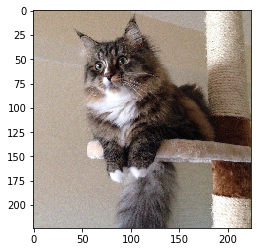

In [91]:
plt.imshow(cat_img_array[2])

In [92]:
'''

画像の中心を切り出し

https://note.nkmk.me/python-pillow-image-crop-trimming/

'''


def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))


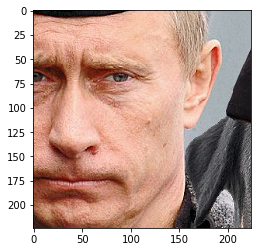

In [101]:
img = Image.open(img_list[11])

img_new = crop_center(img, 224, 224)

plt.imshow(img_new)

## openCVの色形式

In [102]:
import cv2

### グレースケール 

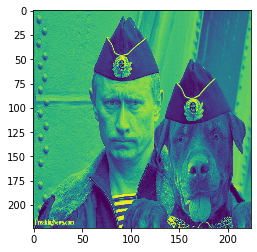

In [103]:
# 第二引数を0にするとグレースケールで読み込める
img = cv2.imread(img_list[11], 0)

# cv2でリサイズ
img = cv2.resize(img, (224, 224))

plt.imshow(img)

### BGRとRGB


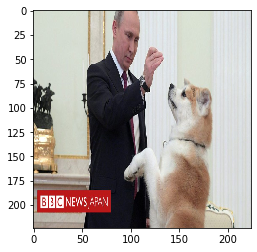

In [105]:
'''

なぜ彼らはOpenCVでBGRカラースペースを選択したのですか？

OpenCVの初期の開発者がBGRカラー形式を選択した理由は、
当時のBGRカラー形式がカメラメーカーとソフトウェアプロバイダーの間で人気があったためです。
たとえば、Windowsでは、COLORREFを使用して色の値を指定する場合、BGR形式0x00bbggrrを使用します。

BGRは歴史的な理由から選択されたものであり、今ではBGRと共存しなければなりません。
言い換えれば、BGRはOpenCVの馬のお尻です。

https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/

'''


img = cv2.imread(img_list[15])
img = cv2.resize(img, (224, 224))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# RGB

plt.imshow(img_rgb)

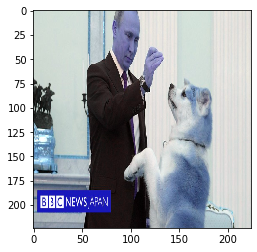

In [106]:
# BGR

plt.imshow(img)

# Sprint データセット

## 2.自作データセットの学習


### 【問題1】自作データセットでの分類の学習
>自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。



In [107]:
path = './20191219-20_Sprint18/sample1/' 
flist = os.listdir(path)

In [108]:
# '.DS_Store'のような隠しファイルを無視したい

flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]
flist_ignore

# jpg 以外を消去
img_list = glob.glob(path + '/*' + ".jpg")

img_list

['./20191219-20_Sprint18/sample1/dog10.jpg',
 './20191219-20_Sprint18/sample1/dog13.jpg',
 './20191219-20_Sprint18/sample1/dog16.jpg',
 './20191219-20_Sprint18/sample1/dog17.jpg',
 './20191219-20_Sprint18/sample1/cat03.jpg',
 './20191219-20_Sprint18/sample1/cat02.jpg',
 './20191219-20_Sprint18/sample1/cat01.jpg',
 './20191219-20_Sprint18/sample1/cat05.jpg',
 './20191219-20_Sprint18/sample1/cat04.jpg',
 './20191219-20_Sprint18/sample1/dog18.jpg']

(224, 224, 3)


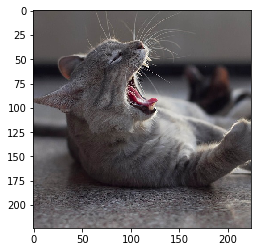

In [110]:
cat_img = Image.open(img_list[5])
        
# サイズを揃える
cat_img = cat_img.resize((224, 224))

cat_img = np.array(cat_img)

print(cat_img.shape)

plt.imshow(cat_img)

In [132]:
#データセット化

# np.resizeはだめ、ぜったい

dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img = Image.open(img)
        
        # サイズを揃える
        dog_img = dog_img.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        
        # 正規化
        dog_img = dog_img / 255.0
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img = Image.open(img)
        
        cat_img = cat_img.resize((224, 224))
        
        cat_img = np.array(cat_img)
        
        cat_img = cat_img / 255.0
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)


In [140]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

#flatten
X_dog = dog_img_array.reshape(-1, 150528) #(5, 150528)
X_cat = cat_img_array.reshape(-1, 150528) #(5, 150528)


dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


In [127]:
import tensorflow as tf
from keras import layers
from keras import models
from keras import optimizers
from keras.layers import GlobalAveragePooling2D



# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(150, 150, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(GlobalAveragePooling2D())
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.RMSprop(lr=1e-4),
#               metrics=['acc'])

# model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [125]:
# from keras.preprocessing.image import ImageDataGenerator

# train_dir = './20191219-20_Sprint18/sample/'
# validation_dir = './20191219-20_Sprint18/sample_val/'

# # rescaled by 1./255
# train_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         # directory
#         train_dir,
#         # resized to 150x150
#         target_size=(150, 150),
#         batch_size=50,
#         # binary labels
#         class_mode='binary')
# # 「class_mode='binary'」は二値分類用のラベルを作ってね、ということ

# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(150, 150),
#         batch_size=50,
#         class_mode='binary')

In [124]:
# history = model.fit_generator(
#       train_generator,
#       steps_per_epoch=200,
#       epochs=300,
#       validation_data=validation_generator,
#       validation_steps=1)



In [120]:
model.save('cat_dog')
#dropout 0.2　は無効にする確率が 0.2ということ

In [ ]:
'''
# 出力ディレクトリがなければ作る
if not os.path.exists(SUBSET_DIR):
    os.mkdir(SUBSET_DIR)
'''

### 【問題2】分類データセットに対するデータ拡張
>データ拡張（Data Augmentation）を行ってください。

《データ拡張のためのライブラリ》
>データ拡張にはalbumentationsなどがあります。
albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries
>また、Kerasを使う場合はImageDataGeneratorも便利です。


《データ拡張の効果の調査》
>データ拡張には様々な方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。

### 【問題3】物体検出データセットの用意
>次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。

《アノテーションのためのツール》
>アノテーションツールにはLabelImgなどがあります。
tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images



### 【問題4】物体検出データセットに対するデータ拡張
>データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。
物体検出の学習を行なうかどうかは任意とします。

